In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Users/Zamri Zortog/Desktop/laba5/khl_2018-2019.csv')
data

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
0,0,Аалтонен Миро,ВИТ,61,19,23,42,9,165,11.5,20,17:39,F
1,1,Аверин Егор,ЛОК,57,13,14,27,15,102,12.7,10,16:18,F
2,2,Авцин Александр,НХК,20,1,2,3,1,24,4.2,8,11:18,F
3,3,Азеведо Джастин,АКБ,62,13,24,37,26,195,6.7,42,16:49,F
4,4,Акмальдинов Александр,СОЧ,30,1,6,7,-3,24,4.2,11,08:30,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,806,Юдин Дмитрий,АКБ,32,0,3,3,-1,40,0.0,24,17:53,D
807,807,Юйэнь Зак,КУН,35,1,1,2,-12,16,6.3,41,10:54,D
808,808,Яношик Адам,СЛВ,56,1,4,5,-24,68,1.5,32,14:54,D
809,809,Ярвинен Йоонас,КУН,39,2,5,7,4,53,3.8,30,19:30,D


In [7]:
processData = data[['games', 'per_shoots']]

processData.sort_values('games', ascending=False)

less30 = processData.loc[processData['games'] < 30]
from30to40 = processData.loc[(processData['games'] >= 30) & (processData['games'] <= 40)]
from41to50 = processData.loc[(processData['games'] >= 41) & (processData['games'] <= 50)]
more60 = processData.loc[processData['games'] >= 51 & (processData['games'] <= 60)]

processData = pd.DataFrame ( 
    [less30.sum(), from30to40.sum(), from41to50.sum(), more60.sum()],
    columns = ['per_shoots'],
    index = ['less30', 'from30to40', 'from41to50', 'more60']
)

n = processData.shape[0]

sumWon = processData['per_shoots'].sum()

processData['Theoretical_per_shoots'] = (sumWon/n) *n

processData

,per_shoots,Theoretical_per_shoots
less30,1290.0,8844.7
from30to40,887.4,8844.7
from41to50,1162.4,8844.7
more60,5504.9,8844.7


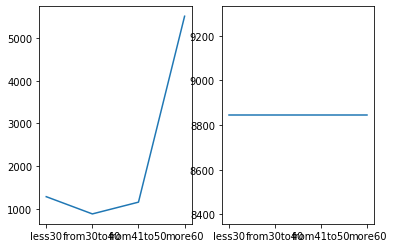

In [8]:
fig = plt.subplots(1,2)

plt.subplot(1, 2, 1)
plt.plot(processData.index, processData['per_shoots'])

plt.subplot(1, 2, 2)
plt.plot(processData.index, processData['Theoretical_per_shoots'])

In [9]:
def pearsonCriteria(significant_level, realData, expectedData):
    

    if not (significant_level == 0.01 
            or significant_level == 0.05):
        significant_level = 0.01
    
    
    if not abs(sum(realData) - sum(expectedData)) < 0.000001:
        expectedexpectedData = expectedData / sum(expectedData) * sum(realData)
        
    # read the excel table
    pearsonTable = pd.read_excel('C:/Users/Zamri Zortog/Desktop/laba5/Pirson_Table.xlsx')
    pearsonTable = pearsonTable.loc[1:, :]
    pearsonTable = pearsonTable.rename(columns={"Unnamed: 0": "level of significance", "Рівень значимості": 0.01, "Unnamed: 2": 0.05})
    pearsonTable.set_index("level of significance", inplace=True)
    
    chiSquared = sum([ (pow(r - e, 2) / e)
                      for r, e in zip(realData, expectedData)
                     ])
                  
    # r coefficient
    rCoef = len(realData) - 1
    
    tableValueToCompare = pearsonTable.loc[rCoef, significant_level]
    
    return tableValueToCompare < chiSquared

In [11]:
processData.insert(1, 'per_shoots %',
                     (np.array([x for x in processData['per_shoots']]) / processData['per_shoots'].sum() * 100)
                  )
processData.insert(3, 'Theoretical_per_shoots %',
                    (np.array([x for x in processData['Theoretical_per_shoots']]) / processData['Theoretical_per_shoots'].sum() * 100)
                  )

In [12]:
processData

,per_shoots,per_shoots %,Theoretical_per_shoots,Theoretical_per_shoots %
less30,1290.0,14.585006,8844.7,25.0
from30to40,887.4,10.033127,8844.7,25.0
from41to50,1162.4,13.142334,8844.7,25.0
more60,5504.9,62.239533,8844.7,25.0


In [13]:
significantLevel01 = pearsonCriteria(0.01, processData['per_shoots'], processData['Theoretical_per_shoots'] )
significantLevel05 = pearsonCriteria (0.05, processData['per_shoots'], processData['Theoretical_per_shoots'] )

results = pd.DataFrame ( 
    [significantLevel01, significantLevel05],
    columns = ["Statistical discrepancy"],
    index = ['0.01', '0.05']
)

results.index.name = 'Signifance'

results

,Statistical discrepancy
Signifance,
0.01,True
0.05,True
